**Data Preprocessing**



In [ ]:
# Import necessary libraries
import pandas as pd     # Import pandas library as 'pd' for data manipulation
import numpy as np      # Import numpy library as 'np' for numerical computations
import matplotlib.pyplot as plt    # Import matplotlib.pyplot as 'plt' for data visualization
import seaborn as sns   # Import seaborn as 'sns' for statistical data visualization

# from google.colab import drive    # Import drive module from google.colab to mount Google Drive
# drive.mount('/content/drive')     # Mount Google Drive to access files

# # Define the file paths to your CSV files in Google Drive
# train_data = '/content/drive/MyDrive/train.csv'    # File path for the training dataset
# test_data = '/content/drive/MyDrive/test.csv'      # File path for the test dataset

# Define the file paths to your CSV files
train_data = 'train.csv'    # File path for the training dataset
test_data = 'test.csv'      # File path for the test dataset

# Read the training dataset from the CSV file, parsing the 'date' column as datetime
df_train = pd.read_csv(train_data, parse_dates=['date'])
df_train.head(5)    # Display the first 5 rows of the DataFrame to check the data


Mounted at /content/drive


,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost
0,t52712528,2017-09-06,night,NaN,S4,D7,2200,expedited,50,NaN,D,68.413152
1,t29859381,2017-10-21,night,NaN,S8,D1,1800,NaN,12,NaN,B,36.450649
2,t25702332,2017-07-15,night,NaN,S9,D5,2800,NaN,1,NaN,B,9.057939
3,t27713405,2017-10-22,day,NaN,S9,D7,3200,NaN,50,NaN,C,57.320087
4,t49439220,2019-12-11,day,snow,S9,D1,2000,NaN,43,NaN,B,77.263777


In [ ]:
# Get the shape of the DataFrame 'df_train'
# Get the size of the DataFrame 'df_train'

df_train.shape, df_train.size

((38999, 12), 467988)

In [ ]:
df_train.info() # Getting the info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   trip                 38999 non-null  object        
 1   date                 38999 non-null  datetime64[ns]
 2   dayPart              38999 non-null  object        
 3   exWeatherTag         4882 non-null   object        
 4   originLocation       38999 non-null  object        
 5   destinationLocation  38999 non-null  object        
 6   distance             38999 non-null  int64         
 7   type                 3748 non-null   object        
 8   weight               38999 non-null  int64         
 9   packageType          2500 non-null   object        
 10  carrier              38999 non-null  object        
 11  cost                 38999 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 3.6+ MB


In [ ]:
df_train.describe() #Getting the description of the data in the dataframe

,distance,weight,cost
count,38999.000000,38999.000000,38999.000000
mean,2004.061643,42.293033,80.972210
std,728.996843,75.473752,180.715055
min,400.000000,1.000000,5.000000
25%,1400.000000,13.000000,38.768742
50%,2000.000000,25.000000,46.468476
75%,2600.000000,39.000000,70.239797
max,3600.000000,500.000000,2019.734797


In [ ]:
df_train.columns    # getting the labels of each column

Index(['trip', 'date', 'dayPart', 'exWeatherTag', 'originLocation',
       'destinationLocation', 'distance', 'type', 'weight', 'packageType',
       'carrier', 'cost'],
      dtype='object')

In [ ]:
# The nunique() function returns a Series that contains the count of distinct (unique) values in each column.
df_train.nunique()

trip                   38999
date                    1074
dayPart                    2
exWeatherTag               2
originLocation             9
destinationLocation        9
distance                  17
type                       1
weight                   499
packageType                1
carrier                    4
cost                    3665
dtype: int64

In [ ]:
# Drop the 'trip' column from the DataFrame 'df_train'
df_train.drop(['trip'],axis=1, inplace=True)
df_train.head(5)

,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost
0,2017-09-06,night,NaN,S4,D7,2200,expedited,50,NaN,D,68.413152
1,2017-10-21,night,NaN,S8,D1,1800,NaN,12,NaN,B,36.450649
2,2017-07-15,night,NaN,S9,D5,2800,NaN,1,NaN,B,9.057939
3,2017-10-22,day,NaN,S9,D7,3200,NaN,50,NaN,C,57.320087
4,2019-12-11,day,snow,S9,D1,2000,NaN,43,NaN,B,77.263777


In [ ]:
# Count the occurrences of each unique value in the 'dayPart' column of the DataFrame 'df_train'
df_train['dayPart'].value_counts()

night    25904
day      13095
Name: dayPart, dtype: int64

In [ ]:
# Count the number of missing (null) values in each column of the DataFrame 'df_train'
df_train.isnull().sum()

date                       0
dayPart                    0
exWeatherTag           34117
originLocation             0
destinationLocation        0
distance                   0
type                   35251
weight                     0
packageType            36499
carrier                    0
cost                       0
dtype: int64

In [ ]:
# Extract the day, month, and year from the 'date' column and create separate columns for each
# The 'date' column is assumed to be a datetime type in 'df_train'.

df_train['day'] = df_train['date'].dt.day     # Create a new column 'day' containing the day component of the 'date' column
df_train['month'] = df_train['date'].dt.month # Create a new column 'month' containing the month component of the 'date' column
df_train['year'] = df_train['date'].dt.year   # Create a new column 'year' containing the year component of the 'date' column

# Drop the 'date' column from the DataFrame 'df_train'
# The 'date' column has been split into individual day, month, and year columns,
# so we no longer need the original 'date' column in the DataFrame.

df_train.drop('date', axis=1, inplace=True)   # Remove the 'date' column from 'df_train'


In [ ]:
# Get the unique values in the 'packageType' column of the DataFrame 'df_train'
df_train['packageType'].unique()

array([nan, 'TT'], dtype=object)

In [ ]:
# Get the unique values in the 'exWeatherTag' column of the DataFrame 'df_train'
df_train['exWeatherTag'].unique()

array([nan, 'snow', 'heat'], dtype=object)

In [ ]:
# Get the unique values in the 'type' column of the DataFrame 'df_train'
df_train['type'].unique()

array(['expedited', nan], dtype=object)

In [ ]:
# Count the occurrences of each unique year in the 'year' column of the DataFrame 'df_train'
df_train['year'].value_counts()

2017    13066
2018    13039
2019    12894
Name: year, dtype: int64

In [ ]:
# Fill missing (NaN) values in the DataFrame 'df_train' with the string 'unknown'
df_train.fillna('unknown', inplace = True)
df_train.head(5)

,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost,day,month,year
0,night,unknown,S4,D7,2200,expedited,50,unknown,D,68.413152,6,9,2017
1,night,unknown,S8,D1,1800,unknown,12,unknown,B,36.450649,21,10,2017
2,night,unknown,S9,D5,2800,unknown,1,unknown,B,9.057939,15,7,2017
3,day,unknown,S9,D7,3200,unknown,50,unknown,C,57.320087,22,10,2017
4,day,snow,S9,D1,2000,unknown,43,unknown,B,77.263777,11,12,2019


In [ ]:
# Count the occurrences of each unique 'exWeatherTag' in the DataFrame 'df_train'
different_exWeatherTag_count = df_train['exWeatherTag'].value_counts()
different_exWeatherTag_count

unknown    34117
snow        3286
heat        1596
Name: exWeatherTag, dtype: int64

Since weather depends on the month we are grouping the month to see whether we can fill any missing value or not.

In [ ]:
# Group the DataFrame 'df_train' by both 'exWeatherTag' and 'month', and calculate the size of each group
grouping_month_table = df_train.groupby(['exWeatherTag', 'month']).size()
grouping_month_table

exWeatherTag  month
heat          6        1596
snow          12       3286
unknown       1        3318
              2        3057
              3        3241
              4        3255
              5        3403
              6        1679
              7        3253
              8        3228
              9        3279
              10       3215
              11       3189
dtype: int64

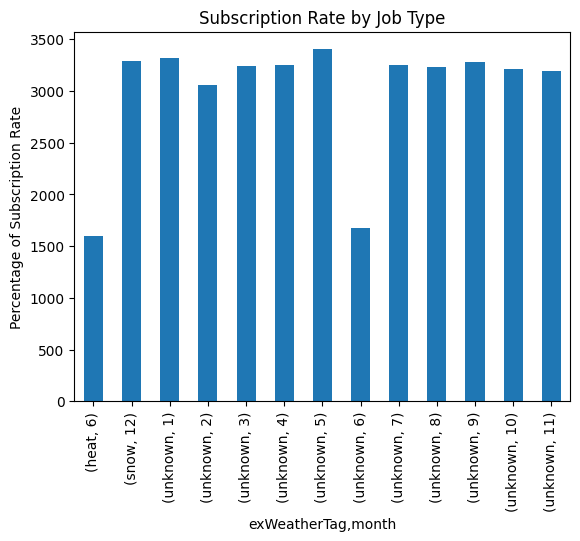

In [ ]:
for category in grouping_month_table.index.levels[0]:
  for income in grouping_month_table[category].index:
    grouping_month_table[category][income] = grouping_month_table[category][income]
# Plot the DataFrame 'grouping_month_table' as a stacked bar chart
grouping_month_table.plot(kind = 'bar', stacked = True)

# Set the y-axis label for the plot
plt.ylabel('Percentage of Subscription Rate')

# Set the title for the plot
plt.title('Subscription Rate by Job Type')

# Display the plot
plt.show()

From the above bar graph we can see that there is a missing value as unknown as heat for the month 6.



In [ ]:
# Get the unique values in the 'exWeatherTag' column of the DataFrame 'df_train'
df_train[df_train['month'] == 12]['exWeatherTag'].unique()

array(['snow'], dtype=object)

In [ ]:
# Get the unique values in the 'exWeatherTag' column of the DataFrame 'df_train'
df_train[df_train['month'] == 6]['exWeatherTag'].unique()

array(['heat', 'unknown'], dtype=object)

Since both unknown and heat are there for 6 month so it will be same weather for whole month.

In [ ]:
# Replace occurrences of 'unknown' in the 'exWeatherTag' column of the DataFrame 'df_train'
df_train[df_train['month'] == 6]['exWeatherTag'].replace('unknown', 'heat')

5        heat
19       heat
25       heat
37       heat
50       heat
         ... 
38946    heat
38962    heat
38977    heat
38990    heat
38991    heat
Name: exWeatherTag, Length: 3275, dtype: object

In [ ]:
# Count the occurrences of each unique value in the 'distance' column of the DataFrame 'df_train'
df_train.distance.value_counts()

2000    4436
2200    3840
1800    3792
2400    3459
1600    3347
2600    2899
1400    2889
2800    2379
1200    2364
3000    1965
1000    1892
3200    1402
800     1401
600      999
3400     988
3600     482
400      465
Name: distance, dtype: int64

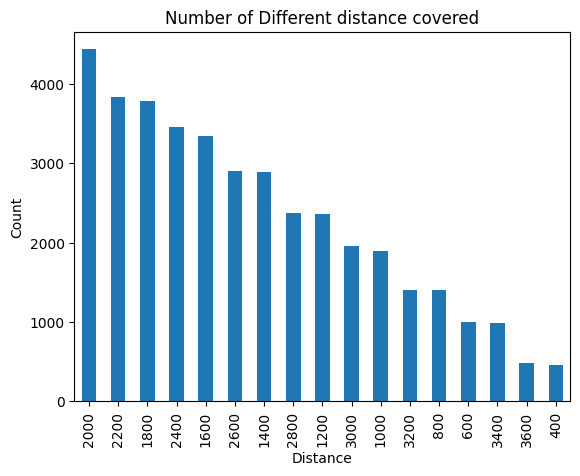

In [ ]:
# Count the occurrences of each unique value in the 'distance' column of the DataFrame 'df_train'
# Plot the 'distance_counts' Series as a bar chart
df_train.distance.value_counts().plot(kind='bar')

# Set the x-axis label for the plot
plt.xlabel('Distance')
# Set the y-axis label for the plot
plt.ylabel('Count')
# Set the title for the plot
plt.title('Number of Different distance covered')
# Display the plot
plt.show()


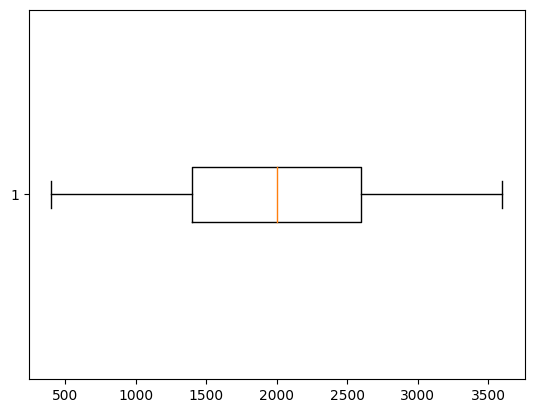

In [ ]:
# Create a box plot to visualize the distribution of distances in the 'distance' column of the DataFrame 'df_train'
plt.boxplot(df_train['distance'], vert = False)
plt.show()

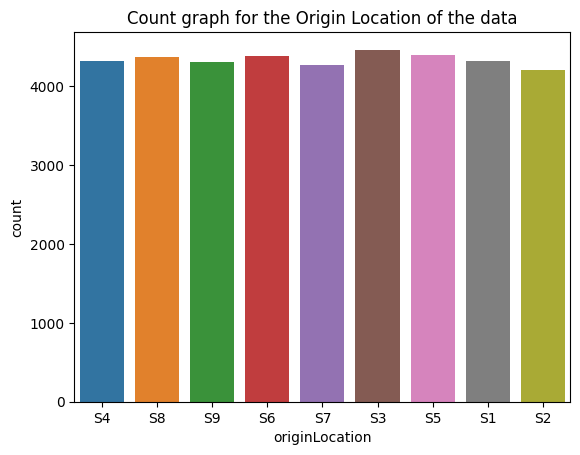

In [ ]:
# Create a count plot to visualize the frequency of each unique value in the 'originLocation' column of the DataFrame 'df_train'
sns.countplot(x=df_train['originLocation'])
# Set the title for the plot
plt.title('Count graph for the Origin Location of the data')
plt.show()

In [ ]:
# Remove the character 'S' from the 'originLocation' column of the DataFrame 'df_train' and convert the values to integers
df_train['originLocation'] = df_train['originLocation'].str.replace(r'S', '').astype(int)
df_train['originLocation'].value_counts()

3    4461
5    4388
6    4379
8    4368
4    4324
1    4312
9    4302
7    4267
2    4198
Name: originLocation, dtype: int64

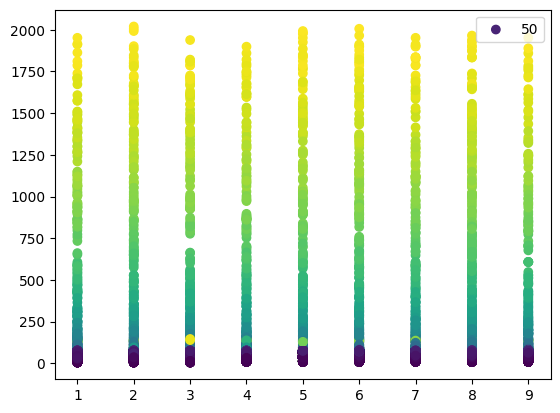

In [ ]:
# Create a scatter plot to visualize the relationship between 'originLocation' and 'cost' columns of the DataFrame 'df_train'
plt.scatter(df_train['originLocation'], df_train['cost'], c = df_train['weight'])
plt.legend(labels=df_train['weight'])

In [ ]:
# Filter the DataFrame 'df_train' to include only rows where the 'weight' column is greater than 1000
df_train[df_train['weight']>1000]

,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost,day,month,year


In [ ]:
# Filter the DataFrame 'df_train' to include only rows where the 'weight' column is greater than 1000
df_train[df_train['weight']>1000].value_counts()

Series([], dtype: int64)

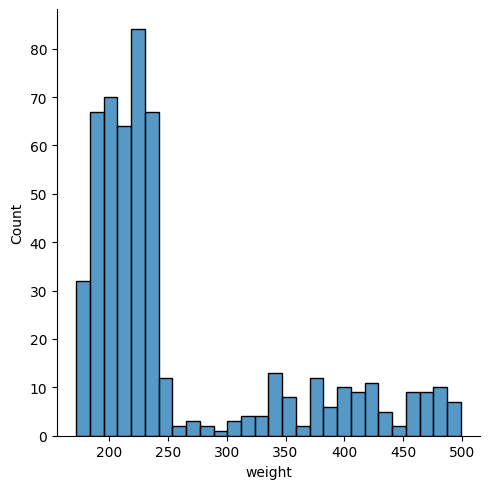

In [ ]:
# Create a distribution plot to visualize the distribution of 'weight' values in the filtered subset of DataFrame 'df_train'
sns.displot(df_train['weight'][(df_train['cost'] < 200) & (df_train['cost'] > 100)])

In [ ]:
# Drop rows from the DataFrame 'df_train' that have 'cost' values between 100 and 200
df_train.drop(index=df_train.loc[(df_train['cost'] < 200) & (df_train['cost'] > 100)].index,inplace=True)
df_train.shape

(38471, 13)

In [ ]:
# Count the occurrences of each unique value in the 'destinationLocation' column of the DataFrame 'df_train'
df_train['destinationLocation'].value_counts()

D8    4418
D3    4334
D9    4313
D5    4289
D2    4270
D7    4235
D6    4217
D1    4215
D4    4180
Name: destinationLocation, dtype: int64

Text(0.5, 1.0, 'Count Plot of Destination Location')

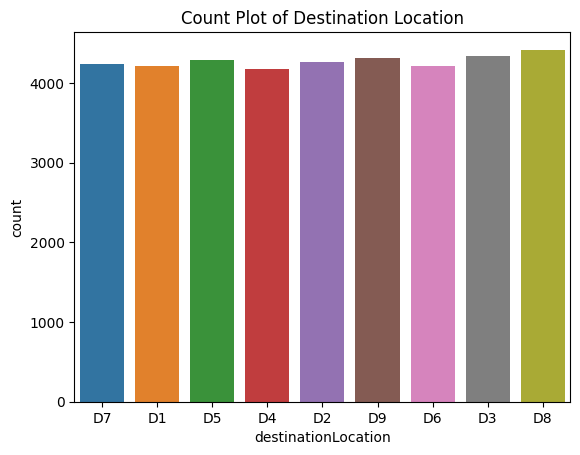

In [ ]:
# Create a count plot to visualize the frequency of each unique value in the 'destinationLocation' column of the DataFrame 'df_train'
sns.countplot(x=df_train['destinationLocation'])
plt.title("Count Plot of Destination Location")

In [ ]:
# Remove the character 'D' from the 'destinationLocation' column of the DataFrame 'df_train' and convert the values to integers
df_train['destinationLocation'] = df_train['destinationLocation'].str.replace(r'D', '').astype(int)
df_train.head(5)

,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost,day,month,year
0,night,unknown,4,7,2200,expedited,50,unknown,D,68.413152,6,9,2017
1,night,unknown,8,1,1800,unknown,12,unknown,B,36.450649,21,10,2017
2,night,unknown,9,5,2800,unknown,1,unknown,B,9.057939,15,7,2017
3,day,unknown,9,7,3200,unknown,50,unknown,C,57.320087,22,10,2017
4,day,snow,9,1,2000,unknown,43,unknown,B,77.263777,11,12,2019


Text(0, 0.5, 'Destination Location')

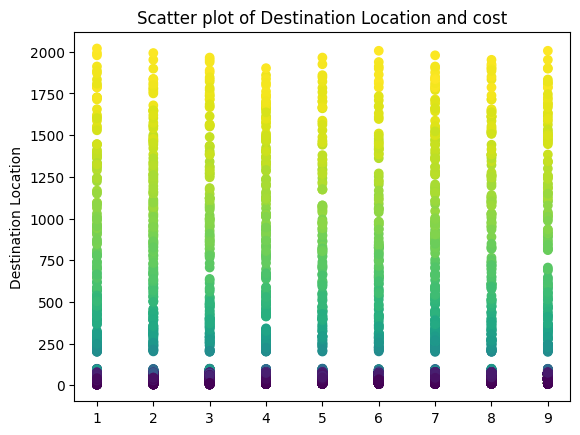

In [ ]:
# Create a scatter plot to visualize the relationship between 'destinationLocation' and 'cost' columns of the DataFrame 'df_train'
plt.scatter(df_train['destinationLocation'],df_train['cost'], c=df_train['weight'])
# Set the title for the plot
plt.title("Scatter plot of Destination Location and cost")
# Set the y-axis label for the plot
plt.ylabel('Destination Location')

<Axes: xlabel='carrier', ylabel='count'>

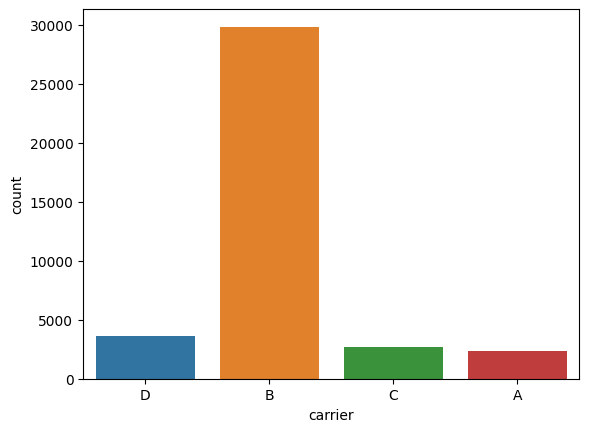

In [ ]:
# Create a count plot to visualize the frequency of each unique value in the 'carrier' column of the DataFrame 'df_train'
sns.countplot(x=df_train['carrier'])

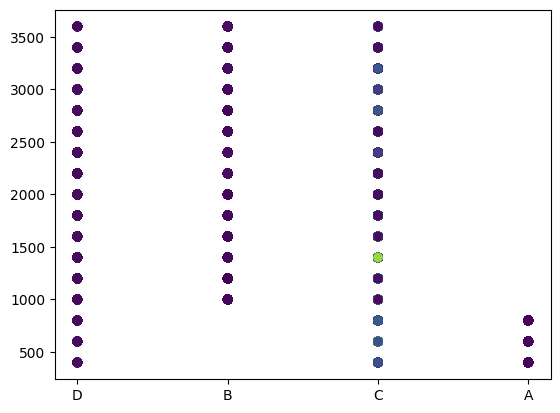

In [ ]:
# Map the categorical values in the 'carrier' column to numerical values and store the result in a new column 'carrier_number'
# The 'apply()' function is used to apply a custom lambda function to each value in the 'carrier' column of the DataFrame 'df_train'.
# The lambda function takes each 'x' value (carrier name) and maps it to a corresponding numerical value based on the specified conditions.
# If the carrier name is 'A', it is mapped to 0. If it is 'B', it is mapped to 1. If it is 'C', it is mapped to 2. Otherwise, it is mapped to 3.
# The resulting numerical values are stored in a new column 'carrier_number' in the DataFrame.
df_train['carrier_number'] = df_train['carrier'].apply(lambda x:0 if x == 'A' else (1 if x== 'B' else(2 if x== 'C' else 3)))
plt.scatter(df_train['carrier'], df_train['distance'], c = df_train['cost'],alpha = 1)

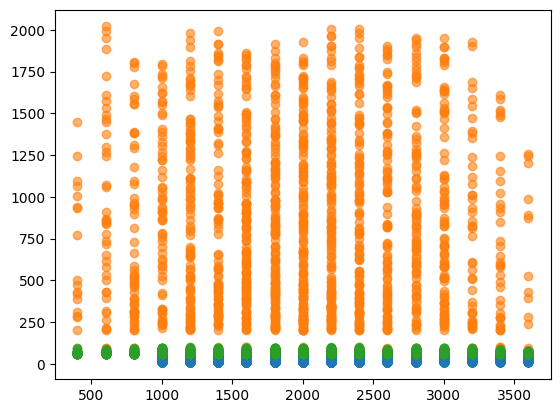

In [ ]:
# Create separate DataFrames for each carrier based on their 'carrier_number' value
# The 'df_train[df_train['carrier_number'] == x]' expression filters the DataFrame 'df_train' to include only rows
# where the 'carrier_number' column has a specific value 'x'. This creates separate DataFrames for each carrier category.
df_carrier1= df_train[df_train['carrier_number'] == 1]
df_carrier2= df_train[df_train['carrier_number'] == 2]
df_carrier3= df_train[df_train['carrier_number'] == 3]
df_carrier4= df_train[df_train['carrier_number'] == 4]

plt.scatter(df_carrier1['distance'], df_carrier1['cost'],alpha=0.6)
plt.scatter(df_carrier2['distance'], df_carrier2['cost'],alpha=0.6)
plt.scatter(df_carrier3['distance'], df_carrier3['cost'],alpha=0.6)
plt.scatter(df_carrier4['distance'], df_carrier4['cost'],alpha=0.6)


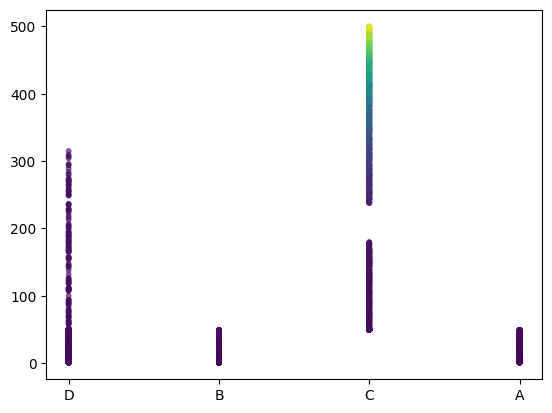

In [ ]:
# Create a scatter plot to visualize the relationship between 'carrier', 'weight', and 'cost' columns of the DataFrame 'df_train'
plt.scatter(df_train['carrier'], df_train['weight'], c= df_train['cost'], alpha =0.6, s= 10)

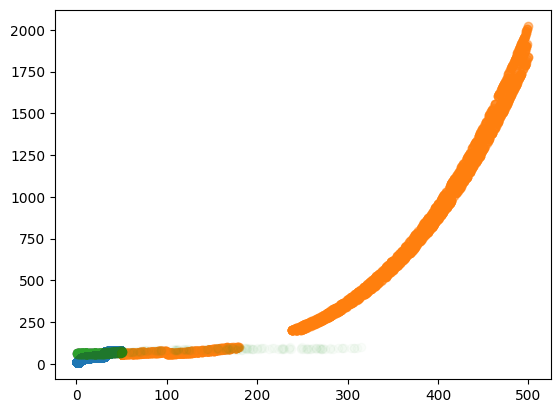

In [ ]:
# Create separate scatter plots to visualize the relationship between 'weight' and 'cost' for each carrier category
# The scatter() function from the matplotlib.pyplot library is used to generate scatter plots for each carrier.
plt.scatter(df_carrier1['weight'], df_carrier1['cost'], alpha=0.5)
plt.scatter(df_carrier2['weight'], df_carrier2['cost'], alpha=0.5)
plt.scatter(df_carrier3['weight'], df_carrier3['cost'], alpha=0.02)
plt.scatter(df_carrier4['weight'], df_carrier4['cost'], alpha=0.02)

In [ ]:
# Drop the 'carrier_number' column from the DataFrame 'df_train'
df_train.drop(columns= ['carrier_number'], axis=1, inplace=True)

In [ ]:
df_train

,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost,day,month,year
0,night,unknown,4,7,2200,expedited,50,unknown,D,68.413152,6,9,2017
1,night,unknown,8,1,1800,unknown,12,unknown,B,36.450649,21,10,2017
2,night,unknown,9,5,2800,unknown,1,unknown,B,9.057939,15,7,2017
3,day,unknown,9,7,3200,unknown,50,unknown,C,57.320087,22,10,2017
4,day,snow,9,1,2000,unknown,43,unknown,B,77.263777,11,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38994,night,unknown,3,3,1200,unknown,3,unknown,B,14.987239,17,10,2019
38995,night,unknown,4,6,2000,unknown,6,unknown,B,33.214738,23,1,2019
38996,night,unknown,8,7,3000,unknown,24,unknown,B,45.172159,3,10,2018
38997,night,unknown,8,5,2600,unknown,31,unknown,B,47.541427,26,2,2018


**Data Analysis using class**

In the code below, we used the class name RegressionModel to with init function which will take different parameters like model_name, model, param_grid, pipeline, best_params best_estimatores and so on.

We also choose the numeric and categorical features for the preprocessing using pipeline.

Then we make the data prepare for training, data prepare for test, build the pipeline using the minmaxscaler, hypertuning using the GridSearchCv along with it's parameters. We create a function to evaluate model and to print the model.

We used different regression model like linear regression, Random Forest regression, SVR and Gradient Boosting regression model.

In [ ]:
# Importing necessary libraries and modules for the regression model
# Regression model libraries and evaluation metrics

from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn import preprocessing, neighbors
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from pandas.api.types import is_numeric_dtype
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Class definition for the RegressionModel
class RegressionModel:
    def __init__(self, model_name, model, param_grid):
        self.model_name = model_name
        self.model = model
        self.param_grid = param_grid
        self.pipeline = None
        self.best_params_ = None
        self.best_estimator_ = None
        self.y_pred = None
        self.mse = None
        self.rmse = None
        self.mae = None
        self.r2 = None
  # Lists to store the names of numeric and categorical features in the dataset
        self.numeric_features = ['distance', 'weight', 'originLocation',
                        'destinationLocation']
        self.categorical_features = ['dayPart', 'exWeatherTag', 'type', 'packageType', 'carrier']

  # Method to prepare data for training the model
    def prepare_data(self, df_train):
        columns = list(df_train.columns)
        columns.remove('cost')   # 'cost' is the target variable

        X = df_train[columns]
        Y = df_train['cost'].astype(int)

        return X, Y

# Method to prepare data for testing the model
    def prepare_test_data(self, df_test):
        columns1 = list(df_test.columns)
        X = df_test[columns1]
        return X

# Method to build the model pipeline with preprocessing steps and the chosen regression model
# Similarly, use MinMaxScaler from sklearn.preprocessing to normalize the training and testing data, using the training data
    def build_pipeline(self):
        scaler = MinMaxScaler()
        numeric_transformer = Pipeline(steps=[('scaler', scaler)])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, self.numeric_features),
                ('cat', OneHotEncoder(handle_unknown='ignore'), self.categorical_features)
            ])

        self.pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', self.model)
        ])

# Method for hyperparameter tuning using GridSearchCV
    def hyperparameter_tuning(self, X_train, y_train, cv=5):
        grid_search = GridSearchCV(
            self.pipeline,
            param_grid=self.param_grid,
            scoring='neg_mean_squared_error',
            cv=cv,
            n_jobs=-1, verbose=1
        )
        grid_search.fit(X_train, y_train)
        self.best_params_ = grid_search.best_params_
        self.best_estimator_ = grid_search.best_estimator_

# Method to evaluate the model using test data and calculate evaluation metrics
    def evaluate_model(self, X_test, y_test):
        self.y_pred = self.best_estimator_.predict(X_test)
        self.mse = mean_squared_error(y_test, self.y_pred)
        self.rmse = mean_squared_error(y_test, self.y_pred, squared=False)
        self.mae = mean_absolute_error(y_test, self.y_pred)
        self.r2 = r2_score(y_test, self.y_pred)

# Method to print the results of the regression model
    def print_results(self):
        print(f"Model: {self.model_name}")
        print(f"Best Hyperparameters: {self.best_params_}")
        print(f"MSE: {self.mse:.2f}")
        print(f"RMSE: {self.rmse:.2f}")
        print(f"MAE: {self.mae:.2f}")
        print(f"R2 Score: {self.r2:.2f}")
        print("-----------------------")

# Initialize the regression models and their hyperparameter grids
# Linear Regression
linear_model = LinearRegression()
linreg_param_grid = {
    'regressor__fit_intercept': [True, False]
    }

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}

# Support Vector Regressor
svr_model = SVR()
svr_param_grid = {
    'regressor__kernel': ['linear', 'poly', 'rbf'],
    'regressor__C': [1, 10, 100],
    'regressor__epsilon': [0.1, 0.01, 0.001]
}

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 3, 5],
    'regressor__learning_rate': [0.1, 0.05, 0.01]
}

# Initialize regression model objects
linear_regression = RegressionModel("Linear Regression", linear_model, linreg_param_grid)
random_forest = RegressionModel("Random Forest Regressor", rf_model, rf_param_grid)
support_vector = RegressionModel("Support Vector Regressor", svr_model, svr_param_grid)
gradient_boosting = RegressionModel("Gradient Boosting Regressor", gb_model, gb_param_grid)

# Prepare data
X, Y = linear_regression.prepare_data(df_train)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X, Y = random_forest.prepare_data(df_train)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X, Y = support_vector.prepare_data(df_train)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X, Y = gradient_boosting.prepare_data(df_train)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Build pipelines
linear_regression.build_pipeline()
random_forest.build_pipeline()
support_vector.build_pipeline()
gradient_boosting.build_pipeline()

# Hyperparameter tuning
linear_regression.hyperparameter_tuning(X_train, y_train)
random_forest.hyperparameter_tuning(X_train, y_train)
support_vector.hyperparameter_tuning(X_train, y_train)
gradient_boosting.hyperparameter_tuning(X_train, y_train)

# Evaluate and print results
linear_regression.evaluate_model(X_test, y_test)
random_forest.evaluate_model(X_test, y_test)
support_vector.evaluate_model(X_test, y_test)
gradient_boosting.evaluate_model(X_test, y_test)

linear_regression.print_results()
random_forest.print_results()
support_vector.print_results()
gradient_boosting.print_results()

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Model: Linear Regression
Best Hyperparameters: {'regressor__fit_intercept': False}
MSE: 4045.54
RMSE: 63.60
MAE: 39.17
R2 Score: 0.87
-----------------------
Model: Random Forest Regressor
Best Hyperparameters: {'regressor__max_depth': None, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
MSE: 74.20
RMSE: 8.61
MAE: 2.95
R2 Score: 1.00
-----------------------
Model: Support Vector Regressor
Best Hyperparameters: {'regressor__C': 100, 'regressor__epsilon': 0.001, 'regressor__kernel': 'poly'}
MSE: 508.34
RMSE: 22.55
MAE: 7.59
R2 Score: 0.98
-----------------------
Model: Gradient Boosting Regressor
Best Hyperparameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
MSE: 77.78
RMSE:

Since we can see from the above data that different model have different MSE, RMSE, MAE,and R2 Score values.Among them RandomForest has the lowest MSE value 74.20 and Linear Regression has the highest 4045.54. We can also see the best params_ after the hypertuning for each model.

In [ ]:
# Read the test CSV file into a DataFrame 'df_test' and parse the 'date' column as datetime objects
df_test=pd.read_csv(test_data, parse_dates=['date'])
df_test.head(5)

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier
0,t333282728025,2017-09-27,night,NaN,S2,D8,2000,NaN,50,NaN,C
1,t35583500660,2017-12-12,day,snow,S2,D1,600,NaN,22,NaN,A
2,t117664376784,2018-11-18,day,NaN,S7,D1,1600,expedited,30,NaN,D
3,t261320757828,2019-11-18,day,NaN,S5,D6,2200,NaN,32,NaN,B
4,t147086054909,2019-06-02,night,heat,S6,D7,2600,NaN,7,NaN,B


Transforming all the test data just like the train data.

In [ ]:
# Extract day, month, and year information from the 'date' column in the 'df_test' DataFrame
df_test['day'] = df_test['date'].dt.day
df_test['month'] = df_test['date'].dt.month
df_test['year'] = df_test['date'].dt.year

# Drop the 'date' column from the 'df_test' DataFrame as it is no longer needed
df_test.drop(columns=['date'],inplace=True)

# Fill any missing values in the 'df_test' DataFrame with the string 'unknown'
df_test.fillna('unknown',inplace=True)

In [ ]:
# Remove character 'D' from the 'destinationLocation' column and convert the column to integer type
df_test['destinationLocation'] = df_test['destinationLocation'].str.replace(r'D', '').astype(int)
df_test.head(5)

,trip,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,day,month,year
0,t333282728025,night,unknown,S2,8,2000,unknown,50,unknown,C,27,9,2017
1,t35583500660,day,snow,S2,1,600,unknown,22,unknown,A,12,12,2017
2,t117664376784,day,unknown,S7,1,1600,expedited,30,unknown,D,18,11,2018
3,t261320757828,day,unknown,S5,6,2200,unknown,32,unknown,B,18,11,2019
4,t147086054909,night,heat,S6,7,2600,unknown,7,unknown,B,2,6,2019


In [ ]:
# Remove character 'S' from the 'originLocation' column and convert the column to integer type
df_test['originLocation'] = df_test['originLocation'].str.replace(r'S', '').astype(int)
df_test['originLocation'].value_counts()

2    116
7     98
3     91
5     89
1     88
9     86
4     84
6     78
8     72
Name: originLocation, dtype: int64

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   trip                 802 non-null    object
 1   dayPart              802 non-null    object
 2   exWeatherTag         802 non-null    object
 3   originLocation       802 non-null    int64 
 4   destinationLocation  802 non-null    int64 
 5   distance             802 non-null    int64 
 6   type                 802 non-null    object
 7   weight               802 non-null    int64 
 8   packageType          802 non-null    object
 9   carrier              802 non-null    object
 10  day                  802 non-null    int64 
 11  month                802 non-null    int64 
 12  year                 802 non-null    int64 
dtypes: int64(7), object(6)
memory usage: 81.6+ KB


Performace on Test set for Linear Regression.

In [ ]:
# Make predictions on test data for Linear Regression
X_test_data=linear_regression.prepare_test_data(df_test)
linear_regression.build_pipeline()
pred_linreg = linear_regression.best_estimator_.predict(X_test_data)
# Create a DataFrame for the output of Linear Regression
output_linreg = pd.DataFrame()
output_linreg['trip'] = df_test['trip']
output_linreg['cost'] = pred_linreg

# Save the output for Linear Regression to a CSV file
output_linreg.to_csv('submission_linreg.csv', index=False)
print("Linear Regression submission was successfully saved!")

Linear Regression submission was successfully saved!


Performace on Test set for Random Forest Regression.

In [ ]:
# For Random Forest Regressor
X_test_data = random_forest.prepare_test_data(df_test)
random_forest.build_pipeline()
pred_rf = random_forest.best_estimator_.predict(X_test_data)
output_rf = pd.DataFrame()
output_rf['trip'] = df_test['trip']
output_rf['cost'] = pred_rf
output_rf.to_csv('submission_rf.csv', index=False)
print("Random Forest submission was successfully saved!")

Random Forest submission was successfully saved!


Performace on Test set for Support Vector Regression.

In [ ]:
# For Support Vector Regressor
X_test_data= support_vector.prepare_test_data(df_test)
support_vector.build_pipeline()
pred_svr = support_vector.best_estimator_.predict(X_test_data)
output_svr = pd.DataFrame()
output_svr['trip'] = df_test['trip']
output_svr['cost'] = pred_svr
output_svr.to_csv('submission_svr.csv', index=False)
print("Support Vector submission was successfully saved!")

Support Vector submission was successfully saved!


Performace on Test set for XGBoost Regression.

In [ ]:
# For Gradient Boosting Regressor
X_test_data = gradient_boosting.prepare_test_data(df_test)
gradient_boosting.build_pipeline()
pred_gb = gradient_boosting.best_estimator_.predict(X_test_data)
output_gb = pd.DataFrame()
output_gb['trip'] = df_test['trip']
output_gb['cost'] = pred_gb
output_gb.to_csv('submission_gb.csv', index=False)
print("Gradient Boosting submission was successfully saved!")


Gradient Boosting submission was successfully saved!
